In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv("data\kc_house_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df_dropped = df.drop(columns=['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'])
display(df_dropped)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,47.5944,-122.299
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004,47.5345,-122.069


In [9]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


In [10]:
df_dropped.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [11]:
df_dropped.waterfront.fillna(0, inplace=True)
display(df_dropped.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045


In [12]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


In [13]:
df_dropped.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

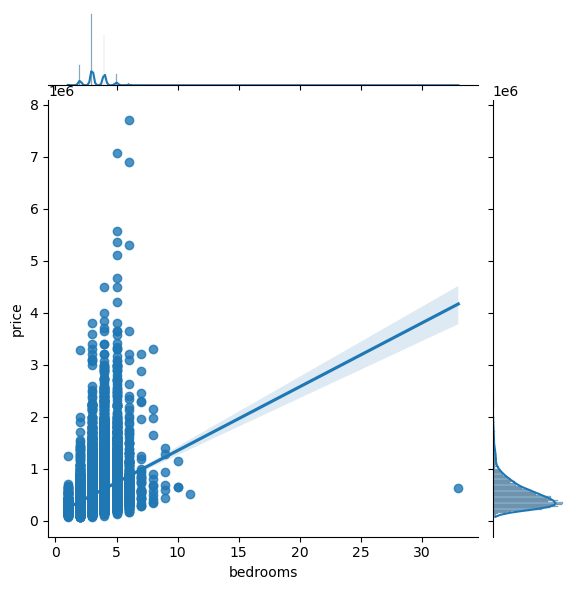

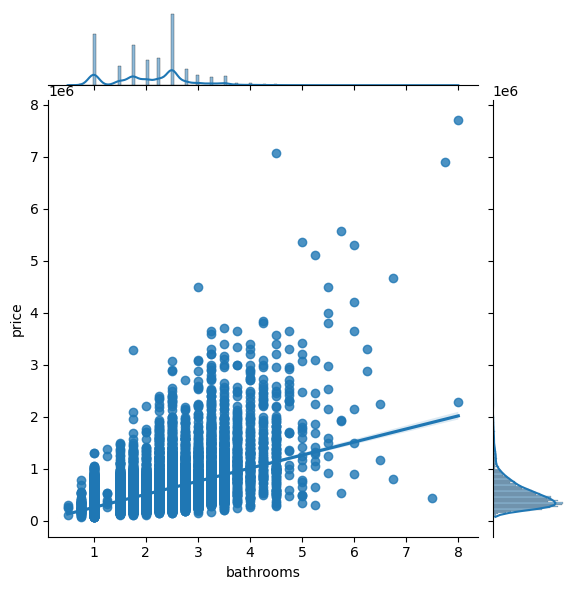

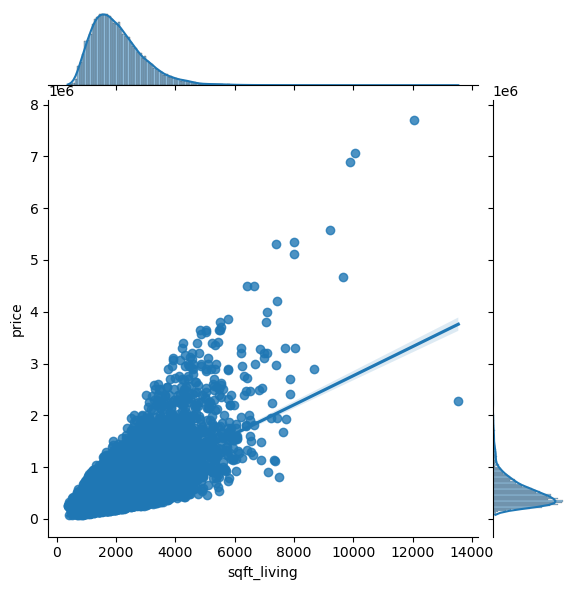

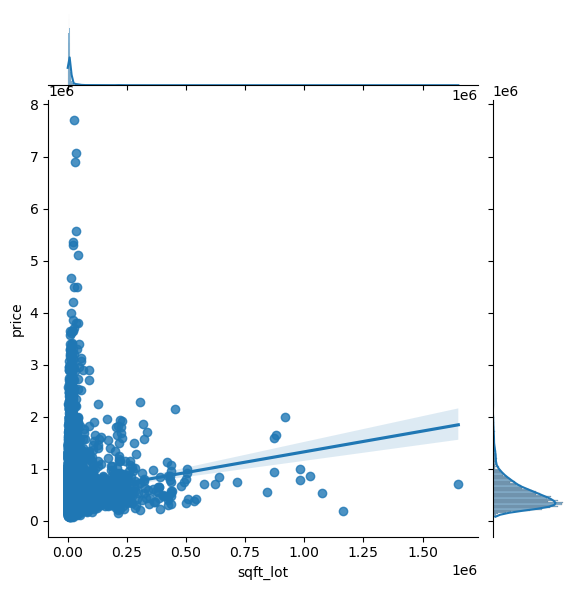

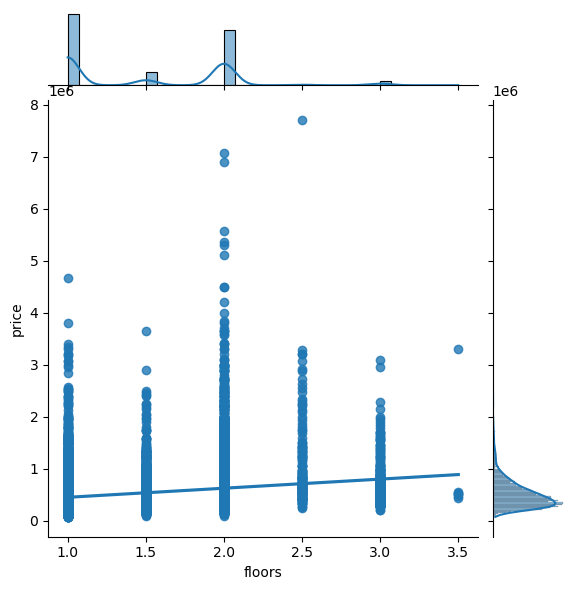

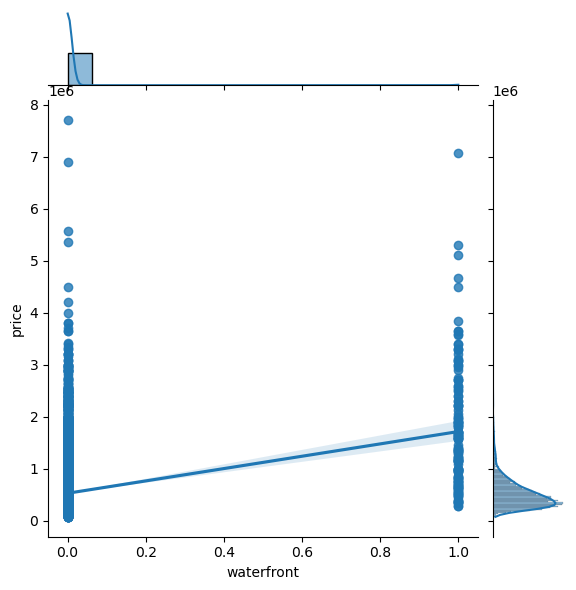

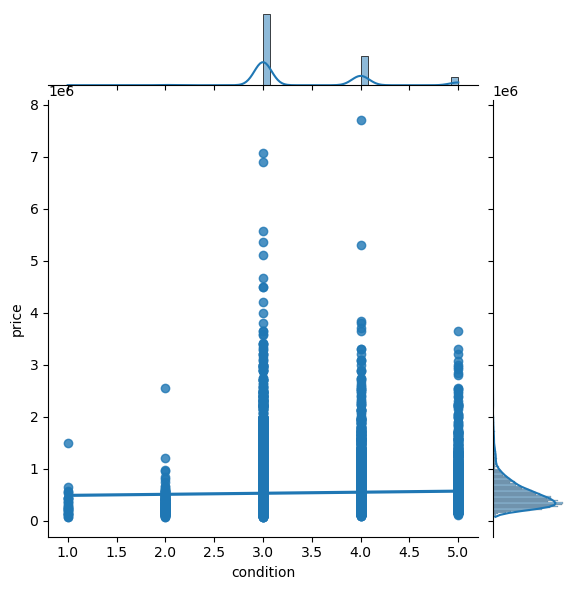

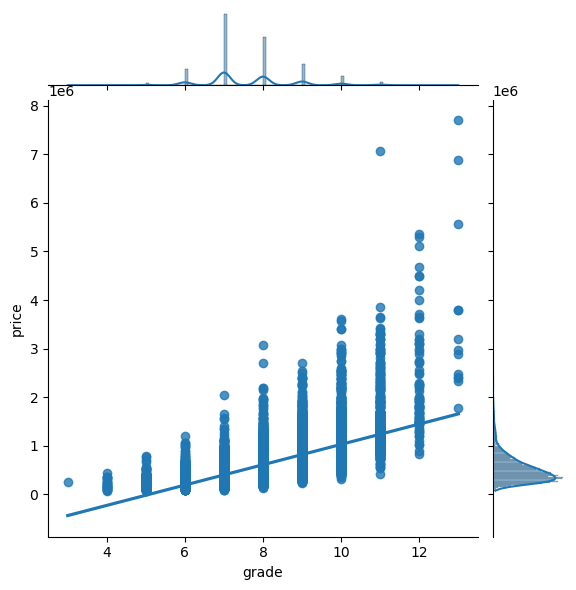

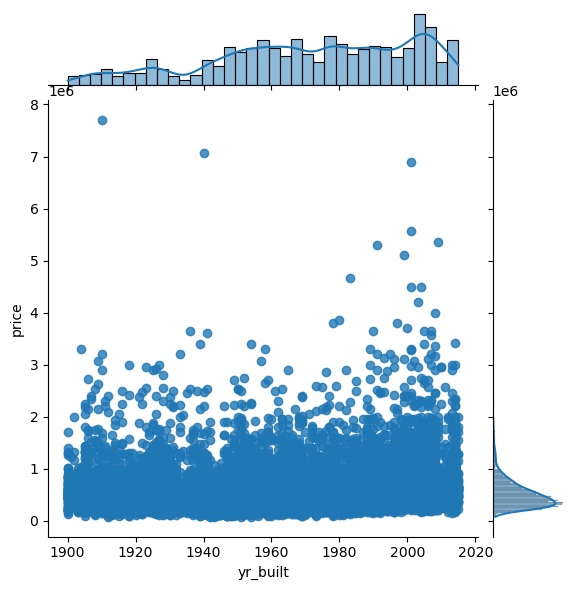

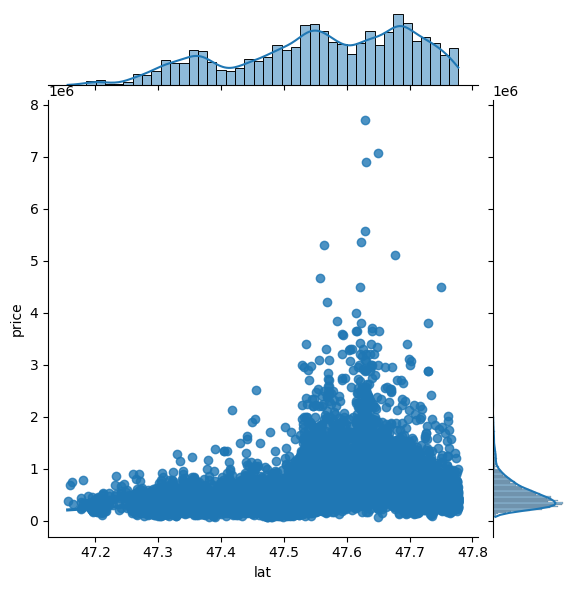

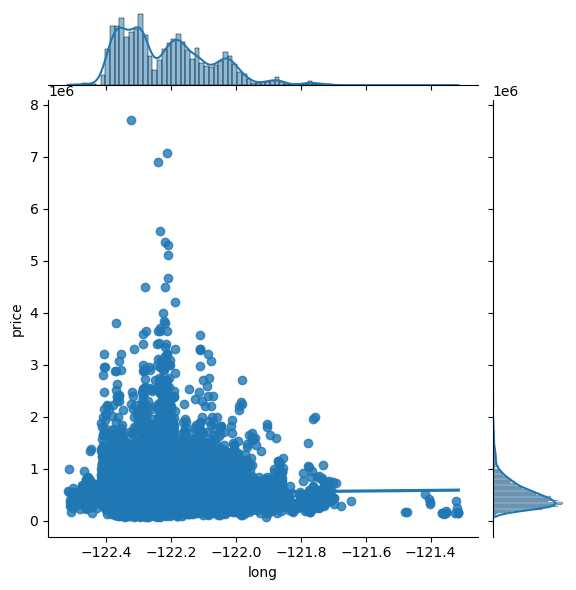

In [15]:
for col_name in df_dropped.columns[1:]:
    ax = sns.jointplot(x=col_name, y='price', data=df_dropped, kind='reg');
    

From the above illustration grade and sqft_living have the highest impact on price

In [16]:
outcome = 'price'
x_cols = list(df_dropped.columns)
x_cols.remove(outcome)
print(x_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'lat', 'long']


In [17]:
predictors = sm.add_constant(df_dropped.drop('price',1))
model_6 = sm.OLS(df_dropped.price, predictors).fit()
model_6.summary()

C:\Users\SFC1\AppData\Local\Temp\ipykernel_32\3119281926.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictors = sm.add_constant(df_dropped.drop('price',1))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     4262.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:47:00   Log-Likelihood:            -2.9493e+05
No. Observations:               21597   AIC:                         5.899e+05
Df Residuals:                   21585   BIC:                         5.900e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.361e+07   1.53e+06    -22.030      0.000   -3.66e+07   -3.06e+07
bedrooms    -3.824e+04   1936.229    -19.752      0.000    -4.2e+04   -3.44e+04
bathrooms    4.339e+04   3268.215     13.277      0.000     3.7e+04    4.98e+04
sqft_living   186.6282      3.148     59.277      0.000     180.457     192.799
sqft_lot       -0.0170      0.036     -0.477      0.633      -0.087       0.053
floors       8519.0784   3278.245      2.599      0.009    2093.476    1.49e+04
waterfront   7.811e+05   1.74e+04     45.022      0.000    7.47e+05    8.15e+05
condition    2.754e+04   2353.301     11.703      0.000    2.29e+04    3.22e+04
grade        1.123e+05   2064.069     54.412      0.000    1.08e+05    1.16e+05
yr_built    -2798.0620     69.646    -40.175      0.000   -2934.574   -2661.550
lat          5.353e+05   1.06e+04     50.379      0.000    5.14e+05    5.56e+05
long        -1.054e+05   1.15e+04     -9.196      0.000   -1.28e+05   -8.29e+04
==============================================================================
Omnibus:                    17960.242   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1564758.969
Skew:                           3.486   Prob(JB):                         0.00
Kurtosis:                      44.113   Cond. No.                     4.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
PRICE = np.log(df_dropped.price)
PRICE = pd.DataFrame(PRICE)

X1= df_dropped.drop('price', 1)
y1= PRICE

C:\Users\SFC1\AppData\Local\Temp\ipykernel_32\4196314201.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1= df_dropped.drop('price', 1)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [20]:
#normalization
for col in x_cols:
    X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()
display(X_train.head())
print(len(X_train), len(X_test))

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
16001,-0.403473,1.800235,0.393211,-0.273366,0.935888,-0.083979,-0.632378,-0.560896,0.984982,0.209924,0.346498
12580,0.670115,1.149116,1.147371,-0.221161,0.008002,-0.083979,-0.632378,-0.560896,-0.605533,0.875643,-0.489357
20796,-0.403473,0.497997,0.316702,-0.256787,0.935888,-0.083979,-0.632378,0.292826,1.458752,-1.368718,1.394858
12284,-0.403473,-1.455361,-1.246268,-0.097894,-0.919883,-0.083979,0.899963,-2.268340,-2.094526,-2.050339,-0.305186
16991,0.670115,0.497997,0.863194,-0.056140,0.935888,-0.083979,0.899963,1.146548,0.511211,0.023436,1.394858


17277 4320


In [21]:
predictors = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, predictors).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     4775.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:06:41   Log-Likelihood:                -1362.7
No. Observations:               17277   AIC:                             2749.
Df Residuals:                   17265   BIC:                             2843.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0491      0.002   6548.577      0.000      13.045      13.053
bedrooms       -0.0141      0.003     -5.528      0.000      -0.019      -0.009
bathrooms       0.0568      0.004     15.913      0.000       0.050       0.064
sqft_living     0.1716      0.004     41.941      0.000       0.164       0.180
sqft_lot        0.0139      0.002      6.667      0.000       0.010       0.018
floors          0.0262      0.003     10.469      0.000       0.021       0.031
waterfront      0.0491      0.002     24.374      0.000       0.045       0.053
condition       0.0419      0.002     19.267      0.000       0.038       0.046
grade           0.2231      0.003     65.158      0.000       0.216       0.230
yr_built       -0.1084      0.003    -37.483      0.000      -0.114      -0.103
lat             0.1845      0.002     88.239      0.000       0.180       0.189
long           -0.0011      0.002     -0.490      0.624      -0.006       0.003
==============================================================================
Omnibus:                      402.085   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              915.555
Skew:                           0.058   Prob(JB):                    1.55e-199
Kurtosis:                       4.122   Cond. No.                         4.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

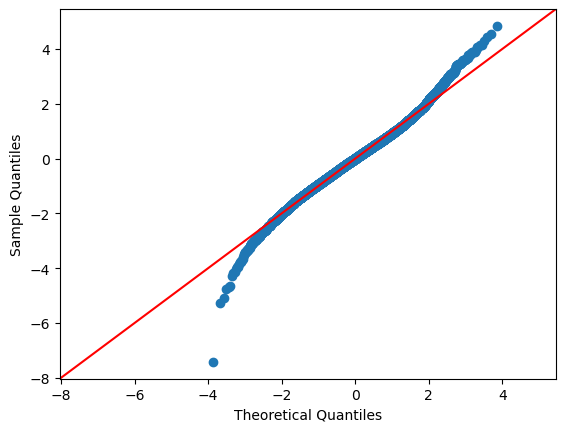

In [24]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

In [49]:
regression = LinearRegression()
regression.fit(X_train, y_train)

#use the regression for the train and test data
y_hat_train = regression.predict(X_train)
y_hat_test = regression.predict(X_test)

#Root Mean Square Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print(f'Train Root Mean Square Error: {train_rmse}')
print(f'Test Root Mean Square Error: {test_rmse}')

Train Root Mean Square Error: 0.26182919461153836
Test Root Mean Square Error: 693.7466952926197


Model 2

<AxesSubplot:>

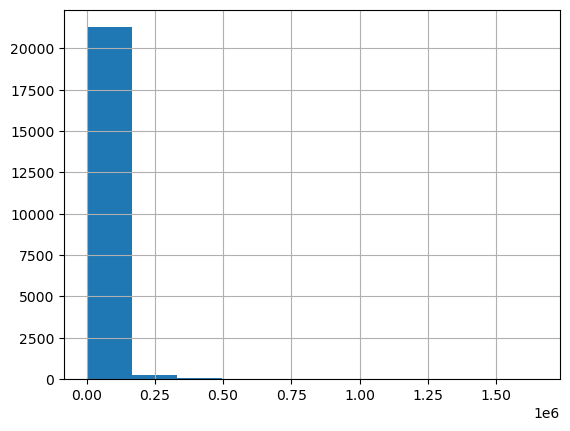

In [25]:
df_dropped.sqft_lot.hist()

<AxesSubplot:>

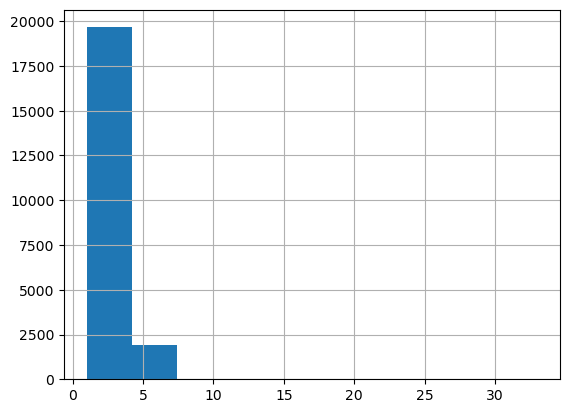

In [26]:
df_dropped.bedrooms.hist()

In [27]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_dropped.sqft_lot.quantile(q=q)))

0.8 percentile: 12182.399999999998
0.81 percentile: 12558.0
0.82 percentile: 13055.439999999995
0.83 percentile: 13503.68
0.84 percentile: 14197.0
0.85 percentile: 15000.0
0.86 percentile: 15716.040000000012
0.87 percentile: 16646.640000000003
0.88 percentile: 18000.0
0.89 percentile: 19550.0
0.9 percentile: 21371.600000000006
0.91 percentile: 24149.360000000015
0.92 percentile: 28505.119999999995
0.93 percentile: 34848.0
0.94 percentile: 37643.19999999999
0.95 percentile: 43307.200000000026
0.96 percentile: 50655.28
0.97 percentile: 67381.71999999988
0.98 percentile: 107157.0
0.99 percentile: 213008.0


In [28]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_dropped.bedrooms.quantile(q=q)))

0.8 percentile: 4.0
0.81 percentile: 4.0
0.82 percentile: 4.0
0.83 percentile: 4.0
0.84 percentile: 4.0
0.85 percentile: 4.0
0.86 percentile: 4.0
0.87 percentile: 4.0
0.88 percentile: 4.0
0.89 percentile: 4.0
0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0


In [29]:
original = len(df_dropped)
df_outlier_filter = df_dropped.copy()
df_outlier_filters = df_outlier_filter[df_outlier_filter.sqft_lot < 100000] # Subsetting to remove extreme outliers
print('Percent removed sqft_lot:', (original -len(df_outlier_filters))/original)

df_outlier_filters = df_outlier_filters[df_outlier_filters.bedrooms < 7] # Subsetting to remove extreme outliers
print('Percent removed bedrooms:', (original -len(df_outlier_filters))/original)

df_outlier_filter['price'] = np.log(df_outlier_filter['price'])

Percent removed sqft_lot: 0.021530768162244755
Percent removed bedrooms: 0.024355234523313424


In [30]:
X2 = df_outlier_filter.drop('price', 1)
y2 = df_outlier_filter['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

predictors = sm.add_constant(X_train2)
model_2 = sm.OLS(y_train2, predictors).fit()
model_2.summary()

C:\Users\SFC1\AppData\Local\Temp\ipykernel_32\3055224357.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2 = df_outlier_filter.drop('price', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     4800.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:30:10   Log-Likelihood:                -1318.3
No. Observations:               17277   AIC:                             2661.
Df Residuals:                   17265   BIC:                             2754.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -45.6010      2.162    -21.097      0.000     -49.838     -41.364
bedrooms       -0.0177      0.003     -6.213      0.000      -0.023      -0.012
bathrooms       0.0752      0.005     16.261      0.000       0.066       0.084
sqft_living     0.0002   4.48e-06     41.673      0.000       0.000       0.000
sqft_lot     3.743e-07    5.5e-08      6.806      0.000    2.66e-07    4.82e-07
floors          0.0568      0.005     12.210      0.000       0.048       0.066
waterfront      0.5615      0.024     23.049      0.000       0.514       0.609
condition       0.0649      0.003     19.472      0.000       0.058       0.071
grade           0.1892      0.003     64.606      0.000       0.183       0.195
yr_built       -0.0038   9.88e-05    -38.027      0.000      -0.004      -0.004
lat             1.3388      0.015     88.814      0.000       1.309       1.368
long           -0.0011      0.016     -0.067      0.947      -0.033       0.031
==============================================================================
Omnibus:                      408.606   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              957.322
Skew:                           0.025   Prob(JB):                    1.32e-208
Kurtosis:                       4.152   Cond. No.                     4.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

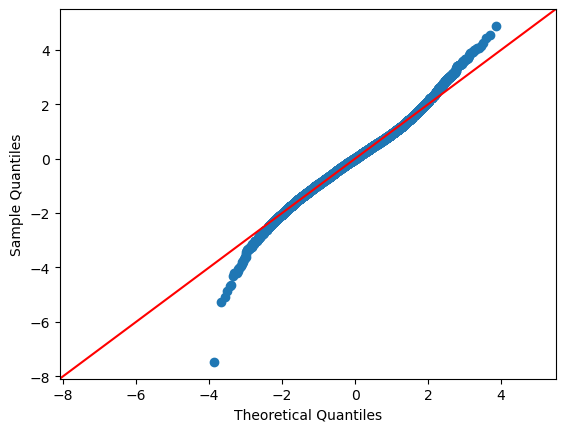

In [31]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

In [50]:
regression2 = LinearRegression()
regression2.fit(X_train2, y_train2)

#use the regression for the train and test data
y_hat_train2 = regression2.predict(X_train2)
y_hat_test2 = regression2.predict(X_test2)

#Root Mean Square Error
train_rmse2 = np.sqrt(mean_squared_error(y_train2, y_hat_train2))
test_rmse2 = np.sqrt(mean_squared_error(y_test2, y_hat_test2))

print(f'Train Root Mean Square Error: {train_rmse2}')
print(f'Test Root Mean Square Error: {test_rmse2}')

Train Root Mean Square Error: 0.2611565966070647
Test Root Mean Square Error: 0.2626190263992478


Model 3

In [33]:
our_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
corr = df_dropped[our_variables].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


<AxesSubplot:>

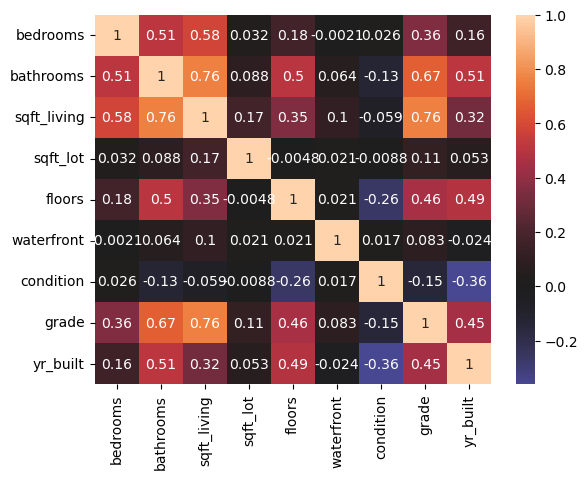

In [36]:
sns.heatmap(corr, center=0,annot = True)

In [37]:
X3 = df_outlier_filter.drop(columns=['price','grade','bathrooms'], axis=1)
y3 = df_outlier_filter['price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train3)
model_3 = sm.OLS(y_train3, predictors).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     4237.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:41:56   Log-Likelihood:                -3345.5
No. Observations:               17277   AIC:                             6711.
Df Residuals:                   17267   BIC:                             6789.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -66.6368      2.392    -27.858      0.000     -71.325     -61.948
bedrooms       -0.0332      0.003    -11.130      0.000      -0.039      -0.027
sqft_living     0.0004   3.33e-06    120.072      0.000       0.000       0.000
sqft_lot     2.733e-07   5.55e-08      4.925      0.000    1.65e-07    3.82e-07
floors          0.1254      0.005     25.269      0.000       0.116       0.135
waterfront      0.6215      0.029     21.468      0.000       0.565       0.678
condition       0.0713      0.004     19.050      0.000       0.064       0.079
yr_built       -0.0017      0.000    -16.510      0.000      -0.002      -0.001
lat             1.4949      0.017     89.334      0.000       1.462       1.528
long           -0.0877      0.018     -4.842      0.000      -0.123      -0.052
==============================================================================
Omnibus:                      609.163   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1768.422
Skew:                          -0.053   Prob(JB):                         0.00
Kurtosis:                       4.564   Cond. No.                     4.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

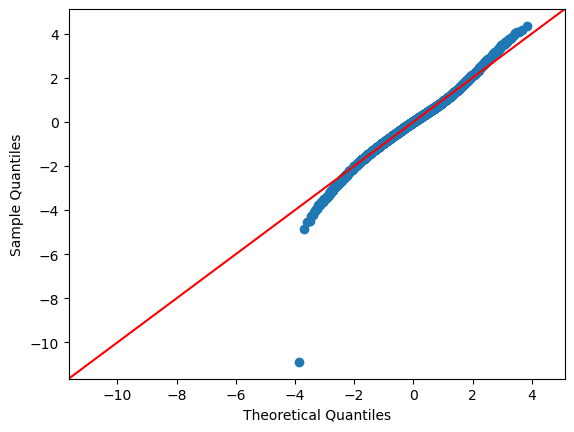

In [38]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [51]:
regression3 = LinearRegression()
regression3.fit(X_train3, y_train3)

#use the regression for the train and test data
y_hat_train3 = regression3.predict(X_train3)
y_hat_test3 = regression3.predict(X_test3)

#Root Mean Square Error
train_rmse3 = np.sqrt(mean_squared_error(y_train3, y_hat_train3))
test_rmse3 = np.sqrt(mean_squared_error(y_test3, y_hat_test3))

print(f'Train Root Mean Square Error: {train_rmse3}')
print(f'Test Root Mean Square Error: {test_rmse3}')

Train Root Mean Square Error: 0.29366991438811063
Test Root Mean Square Error: 0.2945780098169858


Model 4

In [39]:
for col_name in df_outlier_filter.columns[1:]:
    print(col_name)
    print(df_outlier_filter[col_name].skew())

bedrooms
2.023641235344595
bathrooms
0.5197092816403838
sqft_living
1.473215455425834
sqft_lot
13.072603567136046
floors
0.6144969756263127
waterfront
12.039584643829357
condition
1.0360374245132955
grade
0.7882366363846076
yr_built
-0.4694499764949978
lat
-0.4855215900022553
long
0.884888339492565


In [40]:
#only run once
df_outlier_filter['sqft_lot'] = np.log(df_outlier_filter['sqft_lot'])
df_outlier_filter['sqft_lot'].skew()

0.9625003856495555

<AxesSubplot:>

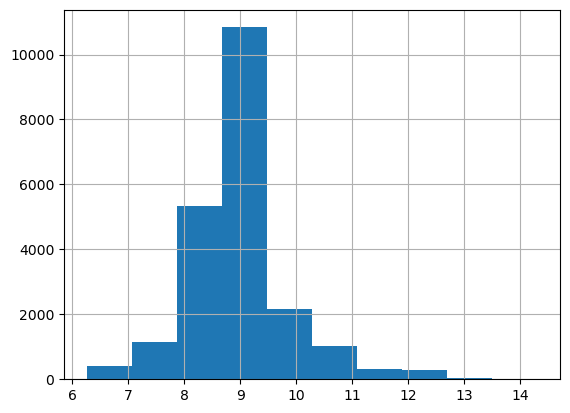

In [41]:
df_outlier_filter['sqft_lot'].hist()

In [42]:
df_outlier_filter['bedrooms'] = np.log(df_outlier_filter['bedrooms'])
df_outlier_filter['bedrooms'].skew()

-0.6805637280656164

In [43]:
X4 = df_outlier_filter.drop(columns=['price'], axis=1)
y4 = df_outlier_filter['price']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train4)
model_4 = sm.OLS(y_train4, predictors).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     4804.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:53:58   Log-Likelihood:                -1299.2
No. Observations:               17277   AIC:                             2622.
Df Residuals:                   17265   BIC:                             2715.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -40.6632      2.305    -17.640      0.000     -45.182     -36.145
bedrooms       -0.0546      0.009     -6.117      0.000      -0.072      -0.037
bathrooms       0.0749      0.005     16.147      0.000       0.066       0.084
sqft_living     0.0002    4.6e-06     42.574      0.000       0.000       0.000
sqft_lot       -0.0091      0.003     -3.190      0.001      -0.015      -0.004
floors          0.0463      0.005      9.417      0.000       0.037       0.056
waterfront      0.5835      0.026     22.741      0.000       0.533       0.634
condition       0.0630      0.003     18.811      0.000       0.056       0.070
grade           0.1890      0.003     64.924      0.000       0.183       0.195
yr_built       -0.0038    9.9e-05    -38.259      0.000      -0.004      -0.004
lat             1.3103      0.015     86.253      0.000       1.281       1.340
long            0.0270      0.017      1.576      0.115      -0.007       0.061
==============================================================================
Omnibus:                      445.870   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1026.640
Skew:                           0.096   Prob(JB):                    1.17e-223
Kurtosis:                       4.179   Cond. No.                     3.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

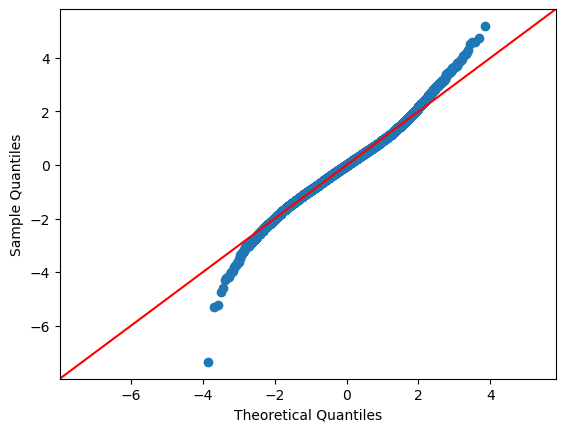

In [44]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

In [45]:
regression4 = LinearRegression()
regression4.fit(X_train4, y_train4)

#use the regression for the train and test data
y_hat_train4 = regression4.predict(X_train4)
y_hat_test4 = regression4.predict(X_test4)

#Root Mean Square Error
train_rmse4 = np.sqrt(mean_squared_error(y_train4, y_hat_train4))
test_rmse4 = np.sqrt(mean_squared_error(y_test4, y_hat_test4))

print(f'Train Root Mean Square Error: {train_rmse4}')
print(f'Test Root Mean Square Error: {test_rmse4}')

Train Root Mean Square Error: 0.260868154903227
Test Root Mean Square Error: 0.26528432311661254


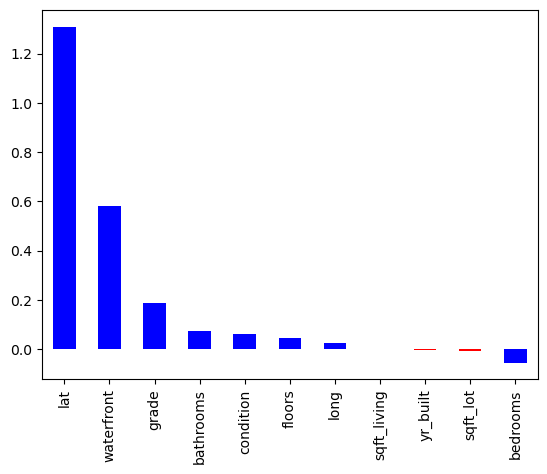

In [46]:
model_4.params[1:].sort_values(ascending=False).plot.bar(color=['blue','blue','blue','blue','blue','blue','blue','red','red','red']);

In [47]:
X_final = df_outlier_filter.drop(columns=['price'], axis=1)
y_final = df_outlier_filter['price']

predictors = sm.add_constant(X_final)
model_final = sm.OLS(y_final, predictors).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     5979.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:55:10   Log-Likelihood:                -1696.6
No. Observations:               21597   AIC:                             3417.
Df Residuals:                   21585   BIC:                             3513.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -39.8191      2.071    -19.228      0.000     -43.878     -35.760
bedrooms       -0.0540      0.008     -6.758      0.000      -0.070      -0.038
bathrooms       0.0726      0.004     17.397      0.000       0.064       0.081
sqft_living     0.0002   4.12e-06     47.166      0.000       0.000       0.000
sqft_lot       -0.0093      0.003     -3.647      0.000      -0.014      -0.004
floors          0.0473      0.004     10.707      0.000       0.039       0.056
waterfront      0.5879      0.022     26.651      0.000       0.545       0.631
condition       0.0631      0.003     21.093      0.000       0.057       0.069
grade           0.1899      0.003     72.756      0.000       0.185       0.195
yr_built       -0.0038   8.85e-05    -42.708      0.000      -0.004      -0.004
lat             1.3200      0.014     96.941      0.000       1.293       1.347
long            0.0378      0.015      2.457      0.014       0.008       0.068
==============================================================================
Omnibus:                      520.394   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1161.834
Skew:                           0.093   Prob(JB):                    5.14e-253
Kurtosis:                       4.121   Cond. No.                     3.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
regression_final = LinearRegression()
regression_final.fit(X_final, y_final)

y_hat_final = regression_final.predict(X_final)
rmse_final = np.sqrt(mean_squared_error(y_final, y_hat_final))

print(f'Test Root Mean Square Error: {rmse_final}')

Test Root Mean Square Error: 0.26174628102447034
